In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA Analysis of Wine Data

Read in the data

In [1]:
df = pd.read_csv('wine_data_wheader.csv')
df

,class,alcohol,malic acid,ash,alcalinity,magnesium,phenols,favinoids,nonflaviood phenols,proanthocyanins,color intensity,hue,OD ratio,prolines
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Column 1 is the "*Class*" of the wine (Good, Better, Best) or (Bad, Meh, Good) or...

Which do you think is the "Best" class?

In [2]:
df.describe()

,class,alcohol,malic acid,ash,alcalinity,magnesium,phenols,favinoids,nonflaviood phenols,proanthocyanins,color intensity,hue,OD ratio,prolines
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Let's look at the distribution of the alcohol content of the three Classes

<IPython.core.display.Javascript object>


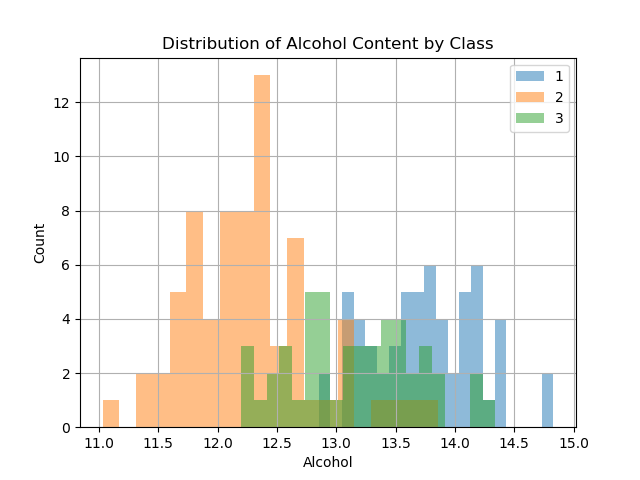

Text(0, 0.5, 'Count')

In [3]:
%matplotlib notebook

df[df['class']==1]['alcohol'].hist(bins=20, label='1', alpha=0.5)
df[df['class']==2]['alcohol'].hist(bins=20, label='2', alpha=0.5)
df[df['class']==3]['alcohol'].hist(bins=20, label='3', alpha=0.5)
plt.legend()
plt.title('Distribution of Alcohol Content by Class')
plt.xlabel('Alcohol')
plt.ylabel('Count')

### No PCA:  Scatterplot of 2 features 

<IPython.core.display.Javascript object>


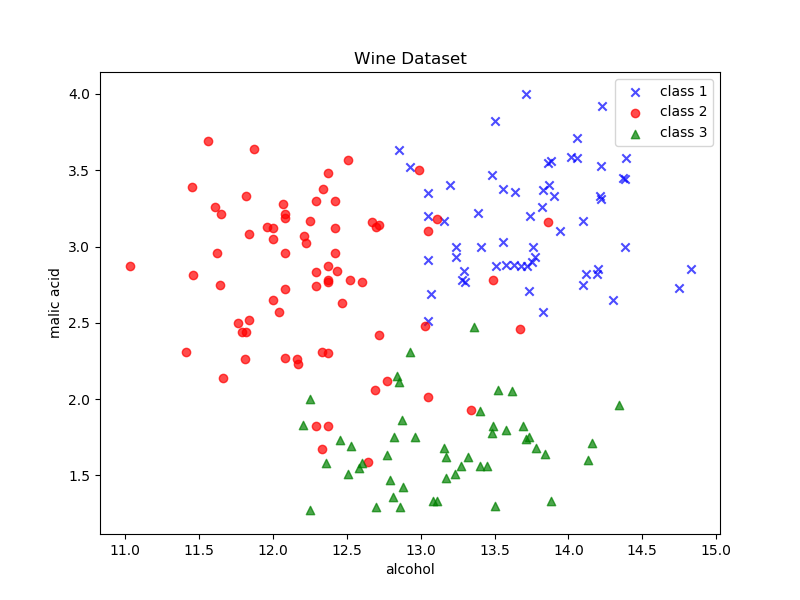

In [7]:
from scipy.stats import pearsonr

plt.figure(figsize=(8,6))

dim1 = 1
dim2 = 12

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(df[df['class']==label].iloc[:,dim1], # x-axis: feat. from col. 1
                df[df['class']==label].iloc[:,dim2], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7,
                label='class {:}'.format(label) # label for the legend
                )

plt.title('Wine Dataset')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


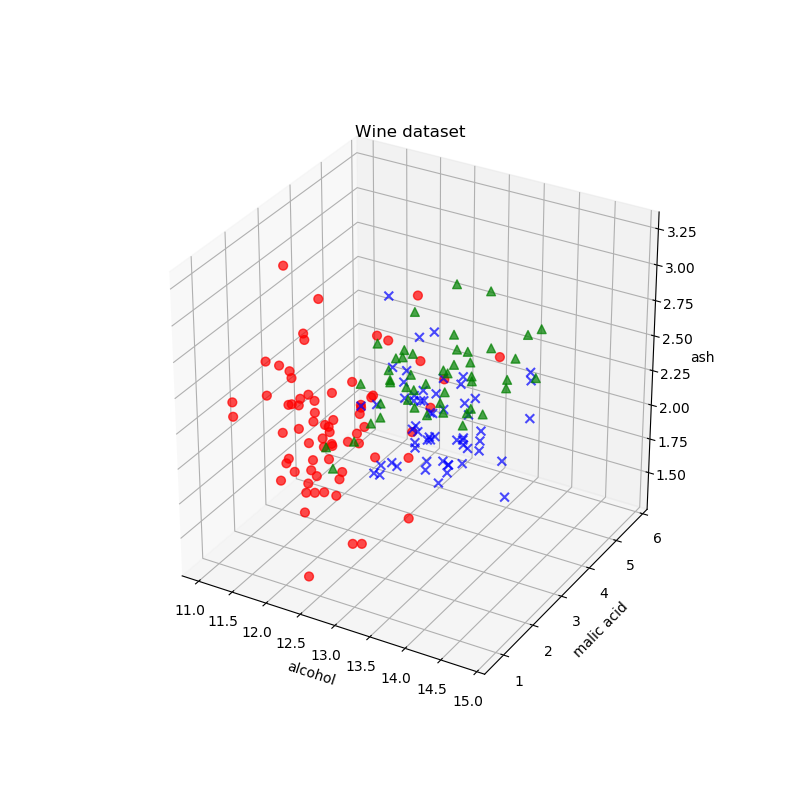

Text(0.5, 0.92, 'Wine dataset')

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

    ax.scatter(
            df[df['class']==label].iloc[:,1], # x-axis: feat. from col. 1
            df[df['class']==label].iloc[:,2], # y-axis: feat. from col. 2
            df[df['class']==label].iloc[:,3], # z-axis: feat. from col. 2
               marker=marker,
               color=color,
               s=40,
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[2])
ax.set_zlabel(df.columns[3])
plt.title('Wine dataset')

---

## PCA Analysis

### First *Standardize* the data

In [9]:
labels = df['class']

In [10]:
df = df.drop(['class'], axis=1)

In [11]:
dfs = (df - df.mean(axis=0))/df.std(0)

In [12]:
dfs.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,phenols,favinoids,nonflaviood phenols,proanthocyanins,color intensity,hue,OD ratio,prolines
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.823954e-15,2.943962e-16,-4.082876e-15,-5.488743e-17,-7.609394e-17,1.234967e-16,9.580351e-16,-1.635396e-15,-1.666270e-15,-4.216353e-16,1.657850e-15,2.200487e-15,-1.341000e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


Use *StandardScaler()* from `sklearn`

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [14]:
data_scaled

array([[ 1.519, -0.562,  0.232, ...,  0.362,  1.848,  1.013],
       [ 0.246, -0.499, -0.828, ...,  0.406,  1.113,  0.965],
       [ 0.197,  0.021,  1.109, ...,  0.318,  0.789,  1.395],
       ...,
       [ 0.333,  1.745, -0.389, ..., -1.612, -1.485,  0.281],
       [ 0.209,  0.228,  0.013, ..., -1.568, -1.401,  0.296],
       [ 1.395,  1.583,  1.365, ..., -1.524, -1.429, -0.595]])

In [15]:
dfs.values

array([[ 1.514, -0.561,  0.231, ...,  0.361,  1.843,  1.01 ],
       [ 0.246, -0.498, -0.826, ...,  0.405,  1.11 ,  0.963],
       [ 0.196,  0.021,  1.106, ...,  0.317,  0.786,  1.391],
       ...,
       [ 0.332,  1.74 , -0.388, ..., -1.608, -1.481,  0.28 ],
       [ 0.209,  0.227,  0.013, ..., -1.564, -1.397,  0.296],
       [ 1.391,  1.579,  1.361, ..., -1.52 , -1.425, -0.593]])

---

At this point, we have scaled data in two forms:

* data_scaled  (a numpy array)
* dfs  (a dataframe)

This is just to illustrate the difference between doing the calculations "directly" and doing them with sklearn tools.

### Covariance Matrix: C

In [16]:
C = dfs.cov()

In [17]:
C

,alcohol,malic acid,ash,alcalinity,magnesium,phenols,favinoids,nonflaviood phenols,proanthocyanins,color intensity,hue,OD ratio,prolines
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100
hue,-0.071747,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183
OD ratio,0.072343,-0.368710,0.003911,-0.276769,0.066004,0.699949,0.787194,-0.503270,0.519067,-0.428815,0.565468,1.000000,0.312761


### Eigenvectors and values of C

In [18]:
evals, evecs = np.linalg.eig(C)

In [19]:
evals

array([4.706, 2.497, 1.446, 0.919, 0.853, 0.642, 0.551, 0.103, 0.348,
       0.169, 0.289, 0.226, 0.251])

`evals` array is almost "in order". $\lambda_1$ is largest, followed by $\lambda_2$, then $\lambda_3$

The matrix of eigenvectors, `evecs`, contains ***column eigenVECTORS*** which correspond to each ***eigenVALUE***

In [20]:
evecs

array([[-0.144,  0.484, -0.207,  0.018, -0.266,  0.214,  0.056, -0.015,
         0.396, -0.266, -0.509, -0.226,  0.212],
       [ 0.245,  0.225,  0.089, -0.537,  0.035,  0.537, -0.421, -0.026,
         0.066,  0.122,  0.075,  0.076, -0.309],
       [ 0.002,  0.316,  0.626,  0.214, -0.143,  0.154,  0.149,  0.141,
        -0.17 , -0.05 ,  0.308, -0.499, -0.027],
       [ 0.239, -0.011,  0.612, -0.061,  0.066, -0.101,  0.287, -0.092,
         0.428, -0.056, -0.2  ,  0.479,  0.053],
       [-0.142,  0.3  ,  0.131,  0.352,  0.727,  0.038, -0.323, -0.057,
        -0.156,  0.062, -0.271,  0.071,  0.068],
       [-0.395,  0.065,  0.146, -0.198, -0.149, -0.084,  0.028,  0.464,
        -0.406, -0.304, -0.286,  0.304, -0.32 ],
       [-0.423, -0.003,  0.151, -0.152, -0.109, -0.019,  0.061, -0.832,
        -0.187, -0.043, -0.05 , -0.026, -0.163],
       [ 0.299,  0.029,  0.17 ,  0.203, -0.501, -0.259, -0.595, -0.114,
        -0.233,  0.042, -0.196,  0.117,  0.216],
       [-0.313,  0.039,  0.149, 

For each eigenvector/value pair, we have:

$C {\bf v}_i = \lambda_i {\bf v}_i$

Let's check that the eigenector/eigenvalue pairs satisfy the above relationship.

$~$

Below, *numpy division* of arrays is "element/element": [a,b,c]/[x,y,z] = [a/x, b/y. c/z]
So if 

$~~~$ [a,b,c] = 5*[x,y,z]

then, 

$~~~$ [a,b,c]/[x,y,z] = [a/x, b/y. c/z] = [5,5,5]


We want to check that:

$\displaystyle{
\frac{C {\bf v}_i}{ {\bf v}_i} = \lambda_i
}$


In [21]:
C @ evecs.T[0,:]/evecs.T[0,:]

alcohol            4.70585
malic acid         4.70585
ash                4.70585
alcalinity         4.70585
magnesium          4.70585
                    ...   
proanthocyanins    4.70585
color intensity    4.70585
hue                4.70585
OD ratio           4.70585
prolines           4.70585
Length: 13, dtype: float64

In [22]:
C @ evecs[:,0]/evecs[:,0]

alcohol            4.70585
malic acid         4.70585
ash                4.70585
alcalinity         4.70585
magnesium          4.70585
                    ...   
proanthocyanins    4.70585
color intensity    4.70585
hue                4.70585
OD ratio           4.70585
prolines           4.70585
Length: 13, dtype: float64

In [23]:
C @ evecs.T[1,:]/evecs.T[1,:]

alcohol            2.496974
malic acid         2.496974
ash                2.496974
alcalinity         2.496974
magnesium          2.496974
                     ...   
proanthocyanins    2.496974
color intensity    2.496974
hue                2.496974
OD ratio           2.496974
prolines           2.496974
Length: 13, dtype: float64

In [24]:
C @ evecs.T[2,:]/evecs.T[2,:]

alcohol            1.446072
malic acid         1.446072
ash                1.446072
alcalinity         1.446072
magnesium          1.446072
                     ...   
proanthocyanins    1.446072
color intensity    1.446072
hue                1.446072
OD ratio           1.446072
prolines           1.446072
Length: 13, dtype: float64

etc.

---

## Projection

To project a data (row) vector, ${\bf d}_i$ onto the *line/direction* of an eigenvector, ${\bf e}_j$ we simply do:

$ {\bf d}_i\cdot {\bf e}_j $

To project the data vector on to the *plane* formed by the direction of two eigenvectors, ${\bf e}_1$ and ${\bf e}_2$, we compute:

$ {\bf d}_i\cdot {\bf e}_1$,  $~~~{\bf d}_i\cdot {\bf e}_2 $

These are the "(x,y)" coordinates of our data point, ${\bf d}_i$, in the ${\bf e}_1$-${\bf e}_2$ plane.

To project ALL the data points (all rows) onto the ${\bf e}_1$-${\bf e}_2$ plane, we do:

In [25]:
dproj2 = data_scaled @ evecs[:,:2]
dproj2

array([[-3.317,  1.443],
       [-2.209, -0.333],
       [-2.517,  1.031],
       [-3.757,  2.756],
       [-1.009,  0.87 ],
       [-3.05 ,  2.122],
       [-2.449,  1.175],
       [-2.059,  1.609],
       [-2.511,  0.918],
       [-2.754,  0.789],
       [-3.48 ,  1.302],
       [-1.755,  0.612],
       [-2.113,  0.676],
       [-3.458,  1.131],
       [-4.313,  2.096],
       [-2.305,  1.663],
       [-2.172,  2.327],
       [-1.899,  1.631],
       [-3.542,  2.518],
       [-2.085,  1.061],
       [-3.124,  0.787],
       [-1.087,  0.242],
       [-2.535, -0.092],
       [-1.645, -0.516],
       [-1.762, -0.317],
       [-0.99 ,  0.941],
       [-1.775,  0.686],
       [-1.235, -0.09 ],
       [-2.188,  0.69 ],
       [-2.256,  0.191],
       [-2.5  ,  1.241],
       [-2.677,  1.472],
       [-1.629,  0.053],
       [-1.903,  1.633],
       [-1.41 ,  0.698],
       [-1.904,  0.177],
       [-1.385,  0.659],
       [-1.122,  0.114],
       [-1.502, -0.769],
       [-2.53 ,  1.803],


In [26]:
dfprj2 = pd.DataFrame(dproj2)
dfprj2['class'] = labels

<IPython.core.display.Javascript object>


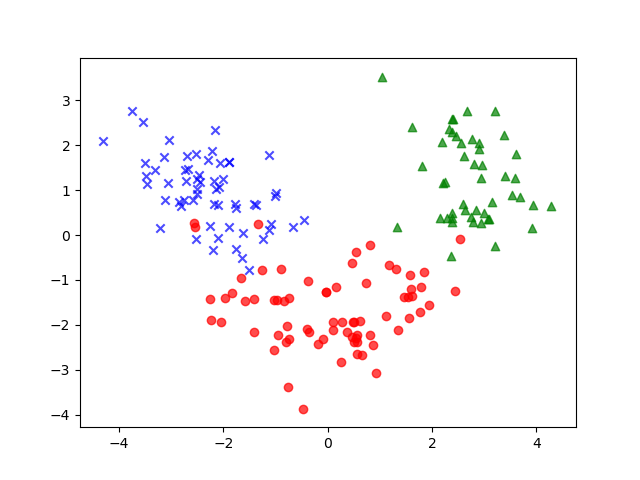

In [27]:
%matplotlib notebook

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=dfprj2[dfprj2['class']==label].iloc[:,0], # x-axis: feat. from col. 1
                y=dfprj2[dfprj2['class']==label].iloc[:,1], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7,
                label='class {:}'.format(label) # label for the legend
                )

## Project to 3D

In [28]:
dproj3 = data_scaled @ evecs[:,:3]
dfprj3 = pd.DataFrame(dproj3)
dfprj3['class'] = labels

<IPython.core.display.Javascript object>


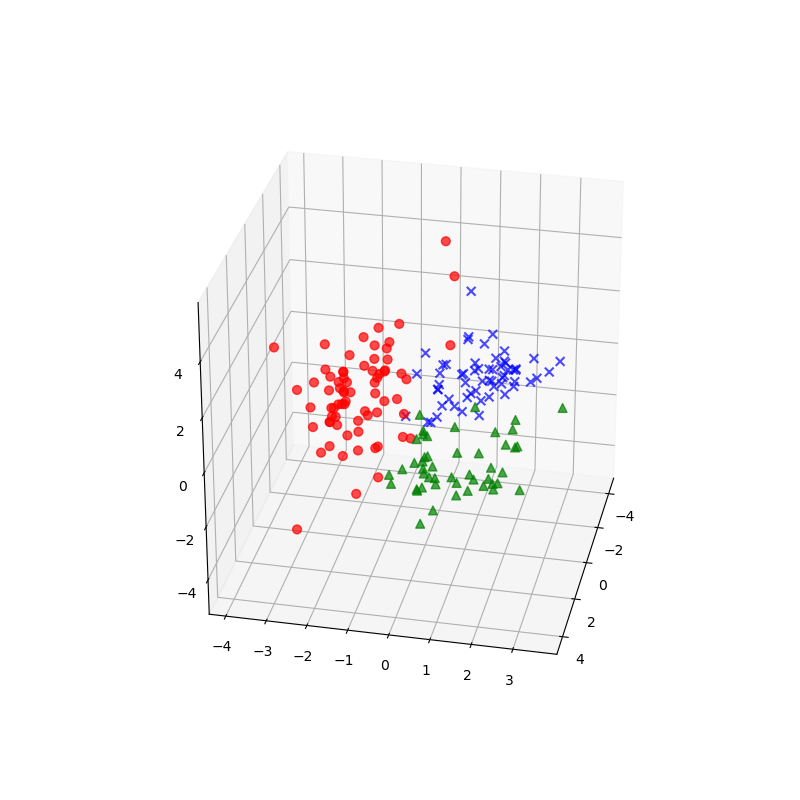

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

    ax.scatter(dfprj3[dfprj3['class']==label].iloc[:,0], # x-axis: feat. from col. 1
               dfprj3[dfprj3['class']==label].iloc[:,1], # y-axis: feat. from col. 2
               dfprj3[dfprj3['class']==label].iloc[:,2], # z-axis: feat. from col. 3
               marker=marker,
               color=color,
               s=40,
               alpha=0.7,
               label='class {}'.format(label))


#plt.title('Wine dataset')